In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick2_ochl
import pandas_datareader as pdr
import time

/home/brady/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
def get_day_data(stock):
    stock = stock.reshape(-1,1440)
    open_price = stock[:,570]
    close_price = stock[:,960]
    high_price = np.amax(stock[:,570:960], axis = 1)
    low_price = np.amin(stock[:,570:960], axis = 1)
    return np.vstack((open_price, close_price, high_price, low_price)).T

In [3]:
num_days = 10**5
N = 1440 * num_days
t = np.linspace(0, num_days, N)

In [42]:
S = np.zeros(N)
S[0] = 100

sigma = 0.02
mu = sigma**2 / 2.0
dt = 0.0001

start = time.clock() 
for i in np.arange(1,N):
    S[i] = S[i-1] * (1 + mu * dt + sigma * np.sqrt(dt) * np.random.normal(0, 1))
end = time.clock()

print end - start

585.378138


In [40]:
#dat = np.vstack((t,S)).T
#np.savetxt('GeoBrown.dat', dat)
np.savetxt('DailyStocksBig.dat', get_day_data(S))

In [4]:
data = np.loadtxt('DailyStocks.dat', delimiter = ' ', unpack = True).T
#data = get_day_data(S)

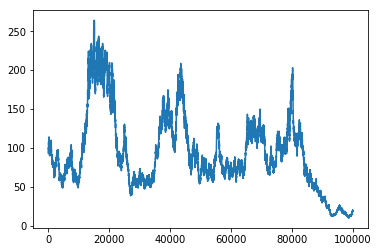

In [44]:
plt.plot(data[:,0])
plt.show()

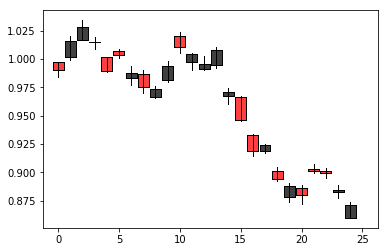

In [52]:
fig, ax = plt.subplots()
candlestick2_ochl(ax, data[0:25,0], data[0:25,1], data[0:25,2], data[0:25,3], width = 0.9)
plt.show()

In [4]:
googleraw = pdr.get_data_yahoo('GOOGL')

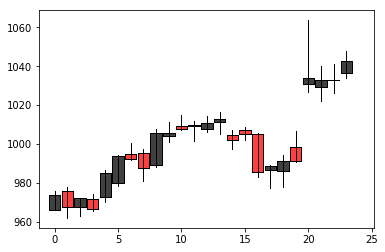

In [46]:
google = googleraw[-25:-1]
fig, ax = plt.subplots()
candlestick2_ochl(ax, google.loc[:,'Open'], google.loc[:,'Close'], google.loc[:,'High'], google.loc[:,'Low'], width = 0.9)
plt.show()

In [36]:
#We want to determine if the stock will close tomorrow at a higher or lower price than today
#Create one hot labels for up and down
close = data[:,1]
diff = close[1:] < close[:-1]
hot_labels = (np.vstack((diff, np.logical_not(diff))).T).astype(int)

In [38]:
print len(hot_labels)

999


In [4]:
data = np.loadtxt('DailyStocks.dat', delimiter = ' ', unpack = True).T

1.0
2.27373675443e-16


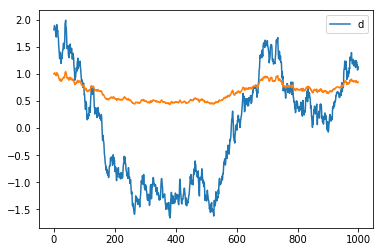

In [24]:
l = np.log(data)

d = (l - l.mean()) / l.std()

print d.var()
print d.mean()

plt.plot(d[:,0], label = 'd')
plt.plot(data[:,0])
plt.legend()
plt.show()

In [7]:
googlearray = googleraw.values

In [9]:
np.savetxt('Google.dat', googlearray)

In [5]:
print data

[[ 0.99752953  0.99013518  0.99752953  0.98423227]
 [ 1.00188957  1.01581404  1.02056536  0.99868628]
 [ 1.0166691   1.02827999  1.03410038  1.0166691 ]
 ..., 
 [ 0.83526762  0.82170827  0.83787088  0.8215107 ]
 [ 0.83943604  0.83512794  0.84077209  0.8303772 ]
 [ 0.84671221  0.8510761   0.85330771  0.84331036]]


In [13]:
def make_labels(data, thresh = 0.005):
    labels = np.zeros((len(data)-1, 3))
    
    for i in range(len(data) - 1):
        t = data[i,0] / data[i+1,0]
        if t > 1 + thresh:
            labels[i][0] += 1
        elif t < 1 - thresh:
            labels[i][1] += 1
        else:
            labels[i][2] += 1
    return labels

In [18]:
l = make_labels(data)
print l
print l.sum(axis=0)

[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 ..., 
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]
[ 395.  388.  216.]


In [19]:
np.savetxt('StockLabels.dat', np.hstack((data[:-1], l)))